# Importing Libraries

In [1]:
import pymysql
from getpass import getpass
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #statist graph package
import matplotlib.pyplot as plt #plot package


# Connecting to MySQL Database

In [2]:
db_name = 'nba'
db_host = '127.0.0.1'
db_usernm = 'root'

In [3]:
def sql_connection():
    # using try and except to make connection and generate errors
    try:
        connection = pymysql.connect(host = db_host,
                                    port = int(3306),
                                    user = db_usernm,
                                    password = getpass('password'),
                                    db = db_name)
        if connection:
            print("Database connected successfully")
            return connection
        else:
            print("Not connected")
    except Exception as e: 
        print(e)

In [4]:
#Calling SQL_connection function to generate connection 
conn = sql_connection()
conn

password········
Database connected successfully


### 1. Select doctors who have consulted with players (Nested Query)

In [6]:
q1= """SELECT Doctor_ID,Name FROM Doctors
WHERE Doctor_ID IN (SELECT DISTINCT Doctor_ID FROM Doctor_Consultation)
LIMIT 10;"""

In [7]:
df1 = pd.read_sql_query(q1, conn)
df1

,Doctor_ID,Name
0,1,Marwin Casajuana
1,2,Aleda Touret
2,4,Martelle Schwand
3,5,Norean MacGruer
4,7,Weber Milton-White
5,8,Gabie Etches
6,11,Sukey Barents
7,14,Leigha Sandifer
8,19,Alexander Wardhough
9,21,Fields Ceci


### 2. Select players and their associated teams using INNER JOIN

In [8]:
q2= """SELECT Players.Player_Name, NBA_Team.Team_Name
FROM Players
INNER JOIN NBA_Team ON Players.Player_ID = NBA_Team.Player_ID;"""

In [9]:
df2= pd.read_sql_query(q2, conn)
df2

,Player_Name,Team_Name
0,Lonny Weyland,Brooklyn Nets
1,Layney Kettlesting,Brooklyn Nets
2,Terrill Carratt,Golden State Warriors
3,Terrill Carratt,Los Angeles Lakers
4,Virgilio Priel,Miami Heat
5,Larry Bagge,Milwaukee Bucks


### 3. Players who have both a diet plan and a workout plan

In [10]:
q3= """ SELECT Player_Name
FROM Players
WHERE EXISTS (
 SELECT 1
 FROM Dietitian
 WHERE Dietitian.Player_ID = Players.Player_ID
) AND EXISTS (
 SELECT 1
 FROM Players
 WHERE Workout_Plan IS NOT NULL
)LIMIT 15;"""

In [11]:
df3= pd.read_sql_query(q3, conn)
df3

,Player_Name
0,Rice Gore
1,Terrill Carratt
2,Noak O'Lenechan
3,Maribel Wilkinson
4,Lynette Jadczak
5,Elke Budnk
6,Stavros Patey
7,Culver Stonary
8,Bev Chatelet
9,Tarah Siemantel


### 4. Top 10 players who have scored more goals than all players with a specific height - ALL


In [12]:
q4= """SELECT Player_Name, Goals_Scored
FROM Players
WHERE Goals_Scored > ALL (
    SELECT Goals_Scored
    FROM Players
    WHERE Height = 5.8)
    ORDER BY Goals_Scored DESC
    LIMIT 10;"""

In [13]:
df4= pd.read_sql_query(q4, conn)
df4

,Player_Name,Goals_Scored
0,Carmela Mather,96
1,Jami Greep,96
2,Barnabe Harbison,93
3,Florian Sivill,91
4,Maribel Wilkinson,90
5,Virgilio Priel,89
6,Gerrie Sanpere,88
7,Dorothea Comusso,87
8,Franky Howford,85
9,Layney Kettlesting,72


### The chart appears to visualize the number of goals scored by the top 10 players who have scored more goals than all players with a specific height of 5.8. Coaches or team managers can use this information to make decisions about player selection, strategy, or training based on goal-scoring performance.

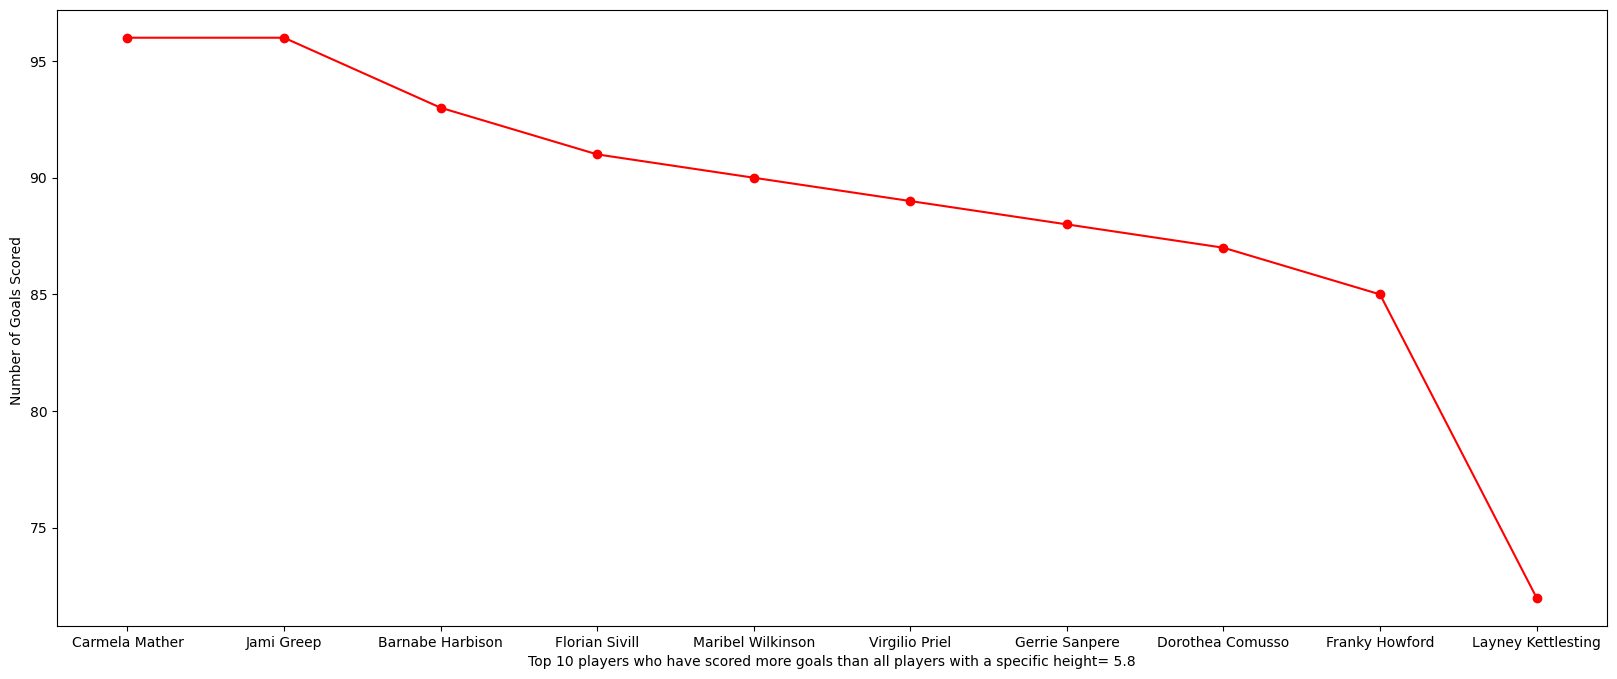

In [15]:
Player_Name = df4['Player_Name'].tolist()
Goals_Scored = df4['Goals_Scored'].tolist()
plt.figure(figsize=(20,8))
plt.plot(Player_Name,Goals_Scored,marker='o', color="red")
plt.xlabel("Top 10 players who have scored more goals than all players with a specific height= 5.8")
plt.ylabel("Number of Goals Scored ")
plt.show()

### 5. Diet Plan of the Players

In [16]:
q5= """ SELECT Diet_Plan, COUNT(Player_ID) AS Total_Players
FROM Players
WHERE Workout_Plan IS NOT NULL
GROUP BY Diet_Plan;"""

In [17]:
df5= pd.read_sql_query(q5, conn)
df5

,Diet_Plan,Total_Players
0,Vegetarian,9
1,Low Carb,9
2,Vegan,13
3,High Protein,8


### This chart distribution of players among different diet plans. The chart helps identify which diet plans are more prevalent among players. Coaches, dietitians, or team managers can gain insights into the popularity of different diet plans among players. This information may be valuable for adjusting team nutrition strategies or tailoring dietary recommendations.

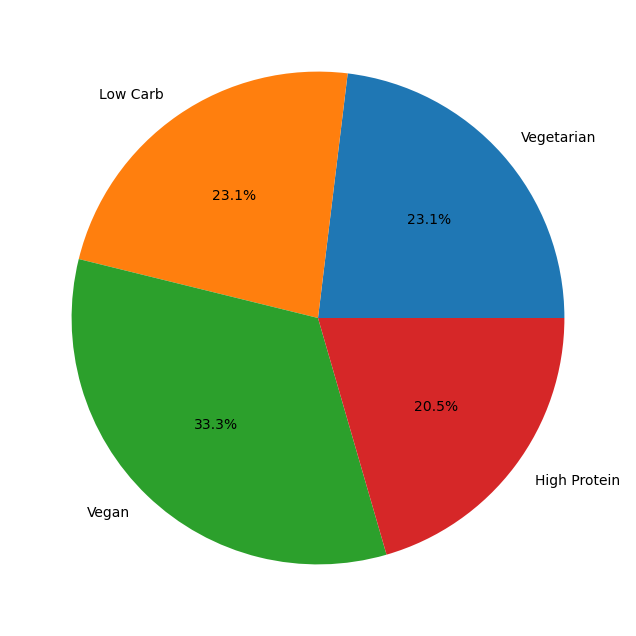

In [18]:
Diet_Plan = df5['Diet_Plan'].tolist()
Total_Players = df5['Total_Players'].tolist()
plt.figure(figsize=(8,8))
plt.pie(Total_Players,labels=Diet_Plan,autopct='%.1f%%')
plt.show()

### 6. Correlation Matrix Heatmap

In [19]:
q6="SELECT Height, 3PTS, 2PTS, Weight, Height, Goals_Scored, Games_Played FROM players";
df6= pd.read_sql_query(q6, conn)

### The provided code calculates the correlation matrix for selected columns from the "players" table and then visualizes the correlations using a heatmap. Positive correlations may suggest that certain physical attributes positively influence each other or that there's a positive relationship between certain types of shots and goals scored. Negative correlations may also be interesting. For example, if there's a negative correlation between "Height" and "2PTS," it might suggest that taller players tend to make fewer two-pointers.

<Axes: >

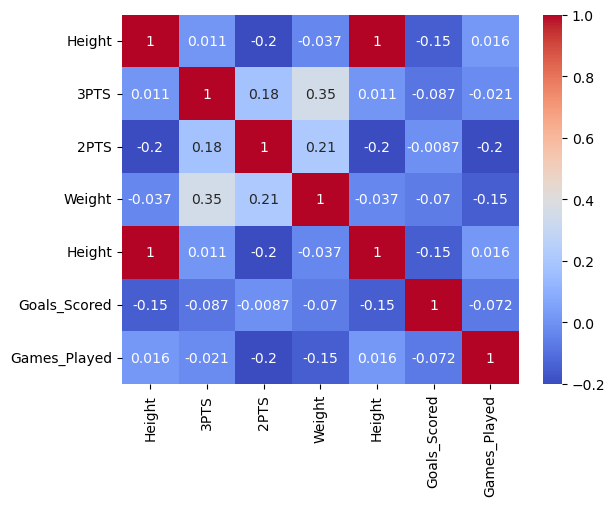

In [20]:
corr = df6.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

### 7. List physios and the total number of treatments they've provided, ordered by the number of treatments in descending order.

In [21]:
q7="""SELECT Physio.Name AS Physio_Name, COUNT(Physio_Treatment.Player_ID) AS Total_Treatments
FROM Physio
RIGHT JOIN Physio_Treatment ON Physio.Physio_ID = Physio_Treatment.Physio_ID
GROUP BY Physio.Name
HAVING Total_Treatments IS NOT NULL
ORDER BY Total_Treatments DESC
LIMIT 15;"""

In [22]:
df7= pd.read_sql_query(q7, conn)
df7

,Physio_Name,Total_Treatments
0,Thatcher,3
1,Brietta,2
2,Esdras,2
3,Yvon,2
4,Regina,2
5,Loleta,2
6,Bard,2
7,Ode,2
8,Arnaldo,2
9,Genevieve,1


### The chart allows for a quick visual comparison of the number of treatments provided by each physiotherapist. It assists in understanding how treatments are distributed among different physiotherapists. Managers can use this chart to assess the performance and contribution of each physiotherapist to the overall treatment process.

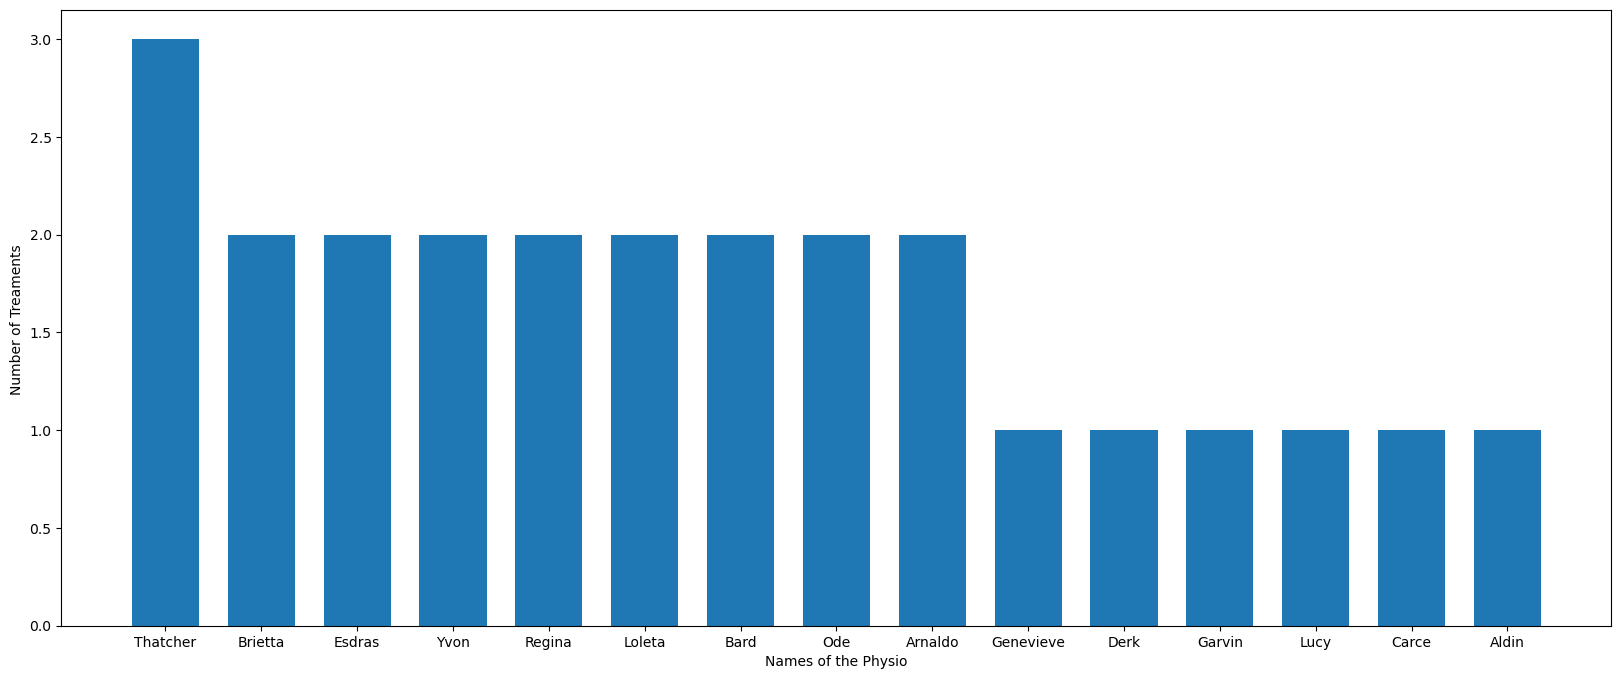

In [23]:
Physio_Name = df7['Physio_Name'].tolist()
Total_Treatments = df7['Total_Treatments'].tolist()
plt.figure(figsize=(20,8))
plt.bar(Physio_Name,Total_Treatments,width = 0.7)
plt.xlabel("Names of the Physio")
plt.ylabel("Number of Treaments ")
plt.show()